In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import jinja2
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [2]:
df = pd.read_csv('internet_service_churn.csv')
df.shape

(72274, 11)

In [3]:
df.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [4]:
df1 = df.drop(['id'],axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   is_tv_subscriber             72274 non-null  int64  
 1   is_movie_package_subscriber  72274 non-null  int64  
 2   subscription_age             72274 non-null  float64
 3   bill_avg                     72274 non-null  int64  
 4   reamining_contract           50702 non-null  float64
 5   service_failure_count        72274 non-null  int64  
 6   download_avg                 71893 non-null  float64
 7   upload_avg                   71893 non-null  float64
 8   download_over_limit          72274 non-null  int64  
 9   churn                        72274 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 5.5 MB


In [5]:
df1.nunique()

is_tv_subscriber                  2
is_movie_package_subscriber       2
subscription_age               1110
bill_avg                        179
reamining_contract              247
service_failure_count            19
download_avg                   2856
upload_avg                      802
download_over_limit               8
churn                             2
dtype: int64

In [6]:
df1.isnull().sum()

is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64

because nan remaining contract means there's no remaining contract hence 0 years

In [7]:
df1.reamining_contract.fillna(0,inplace=True)
df1.isnull().sum()

is_tv_subscriber                 0
is_movie_package_subscriber      0
subscription_age                 0
bill_avg                         0
reamining_contract               0
service_failure_count            0
download_avg                   381
upload_avg                     381
download_over_limit              0
churn                            0
dtype: int64

In [8]:
categorical = [var for var in df1.columns if df1[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
if len(categorical)>=1:
    print('The categorical variables :', categorical)

There are 0 categorical variables



In [9]:
numerical = [var for var in df1.columns if df1[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
if len(numerical)>1:
    print('The numerical variables :', numerical)

There are 10 numerical variables

The numerical variables : ['is_tv_subscriber', 'is_movie_package_subscriber', 'subscription_age', 'bill_avg', 'reamining_contract', 'service_failure_count', 'download_avg', 'upload_avg', 'download_over_limit', 'churn']


array([[<AxesSubplot: title={'center': 'is_tv_subscriber'}>,
        <AxesSubplot: title={'center': 'is_movie_package_subscriber'}>,
        <AxesSubplot: title={'center': 'subscription_age'}>],
       [<AxesSubplot: title={'center': 'bill_avg'}>,
        <AxesSubplot: title={'center': 'reamining_contract'}>,
        <AxesSubplot: title={'center': 'service_failure_count'}>],
       [<AxesSubplot: title={'center': 'download_avg'}>,
        <AxesSubplot: title={'center': 'upload_avg'}>,
        <AxesSubplot: title={'center': 'download_over_limit'}>],
       [<AxesSubplot: title={'center': 'churn'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

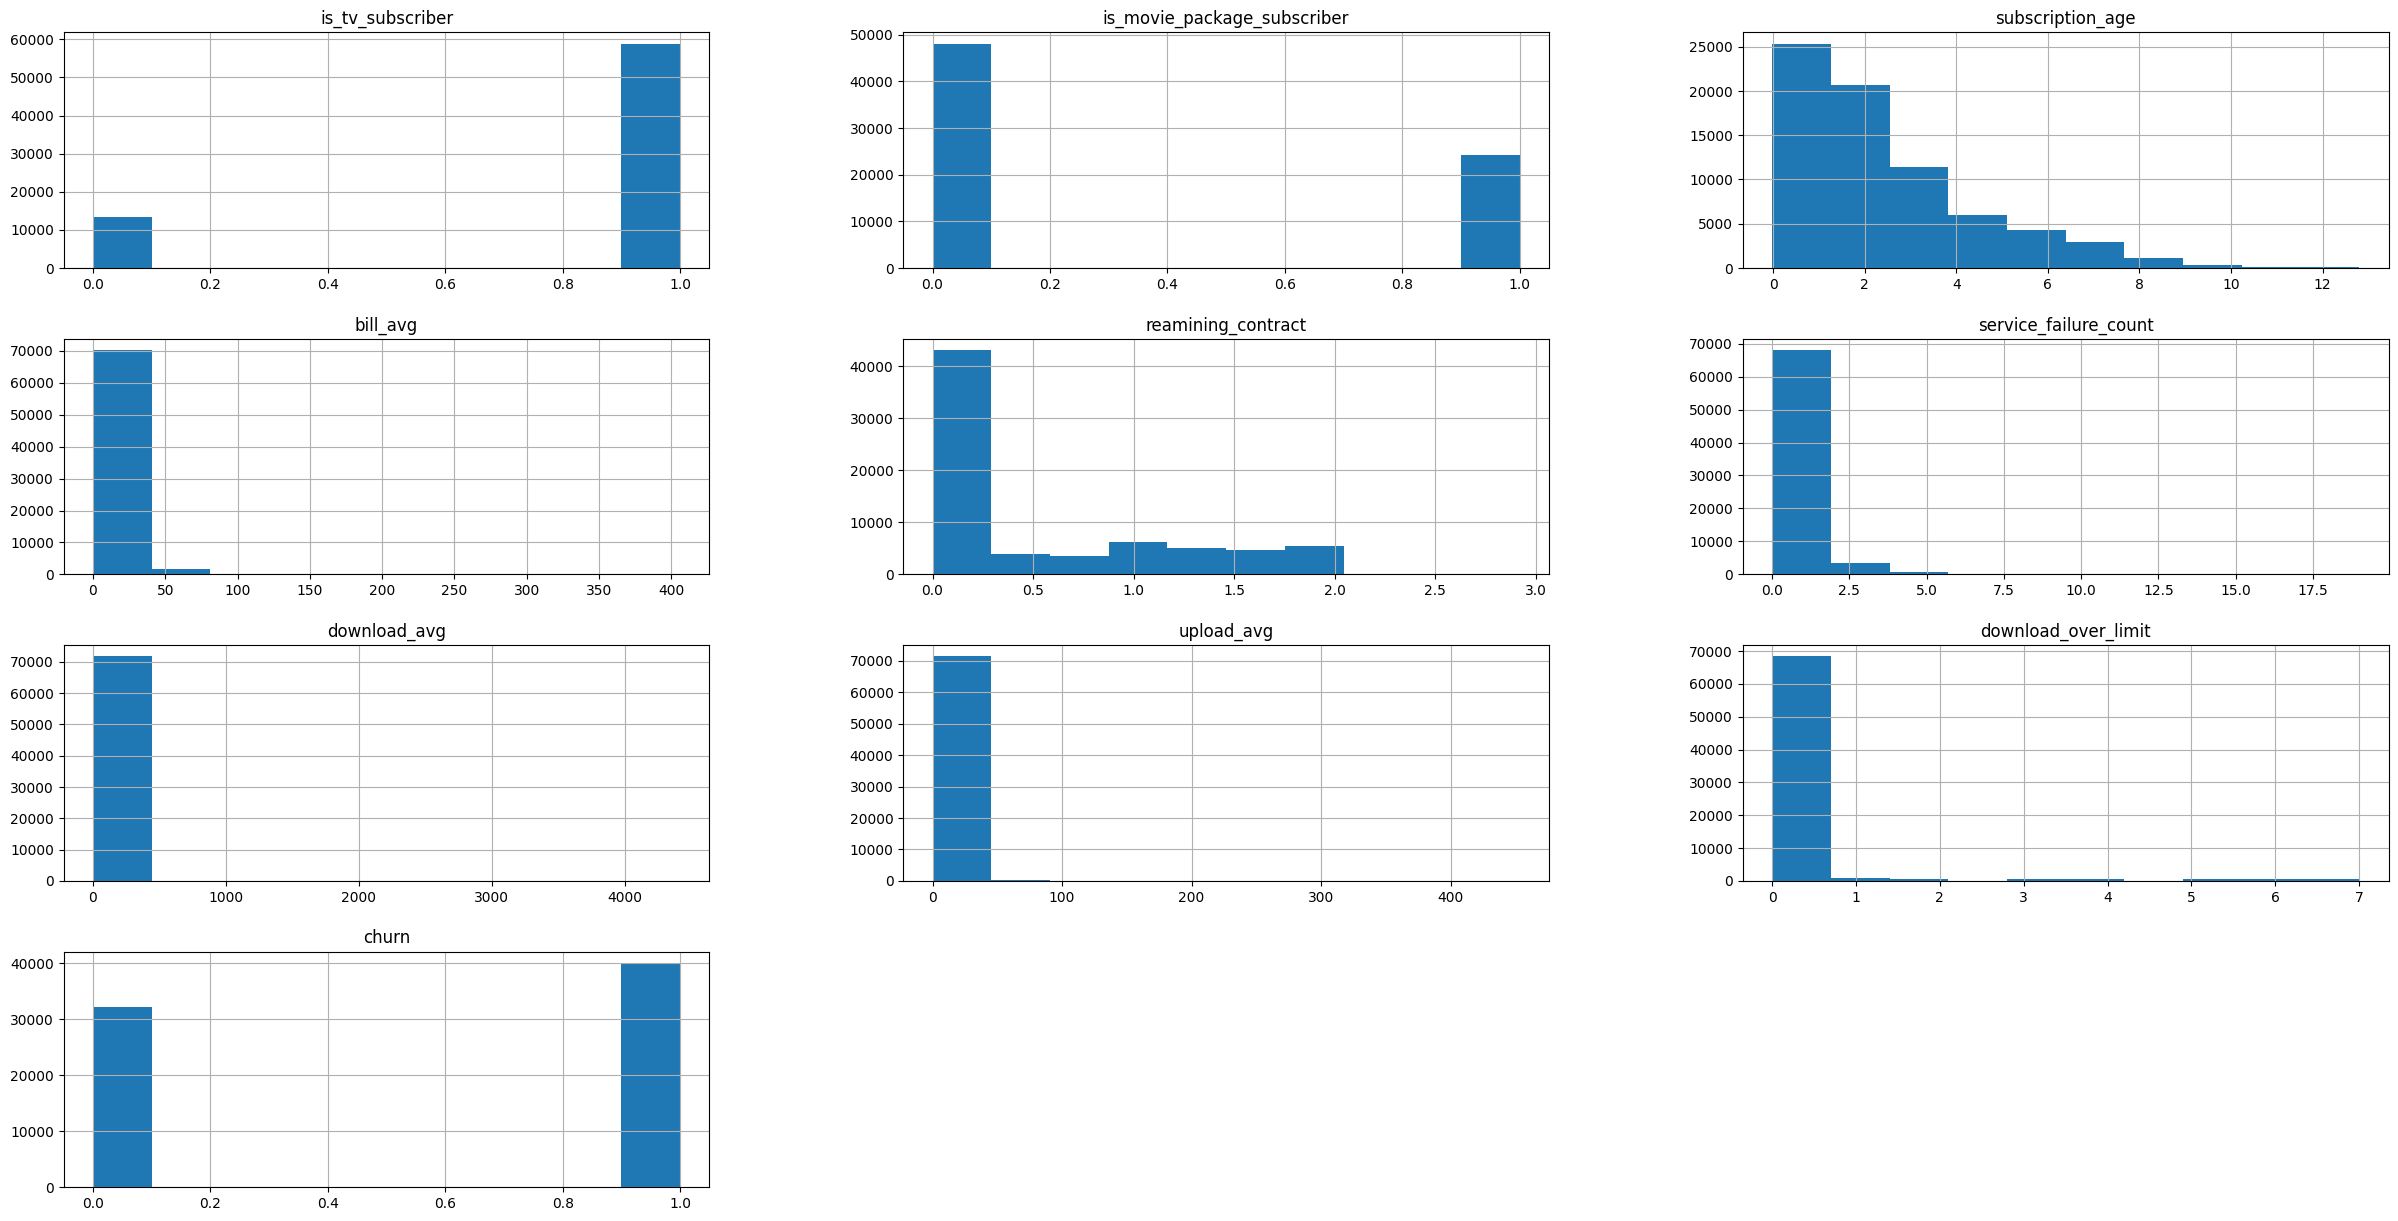

In [10]:
df1[numerical].hist(figsize=(30,15))

In [11]:
df1.isnull().sum()

is_tv_subscriber                 0
is_movie_package_subscriber      0
subscription_age                 0
bill_avg                         0
reamining_contract               0
service_failure_count            0
download_avg                   381
upload_avg                     381
download_over_limit              0
churn                            0
dtype: int64

In [12]:
df1.download_avg.fillna(df1.download_avg.median(),inplace=True)
df1.upload_avg.fillna(df1.upload_avg.median(),inplace=True)

In [13]:
df1.isnull().sum()

is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
reamining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64

In [14]:
#Using the InterQuartile Range to fill the values
def remove_outlier(i , col):
    Q1 = i[col].quantile(0.25)
    Q3 = i[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df1[col] = np.clip(i[col] , lower_whisker , upper_whisker)
    return i

def treat_outliers_all(df , col_list):
    for c in col_list:
        i = remove_outlier(df , c)
    return i

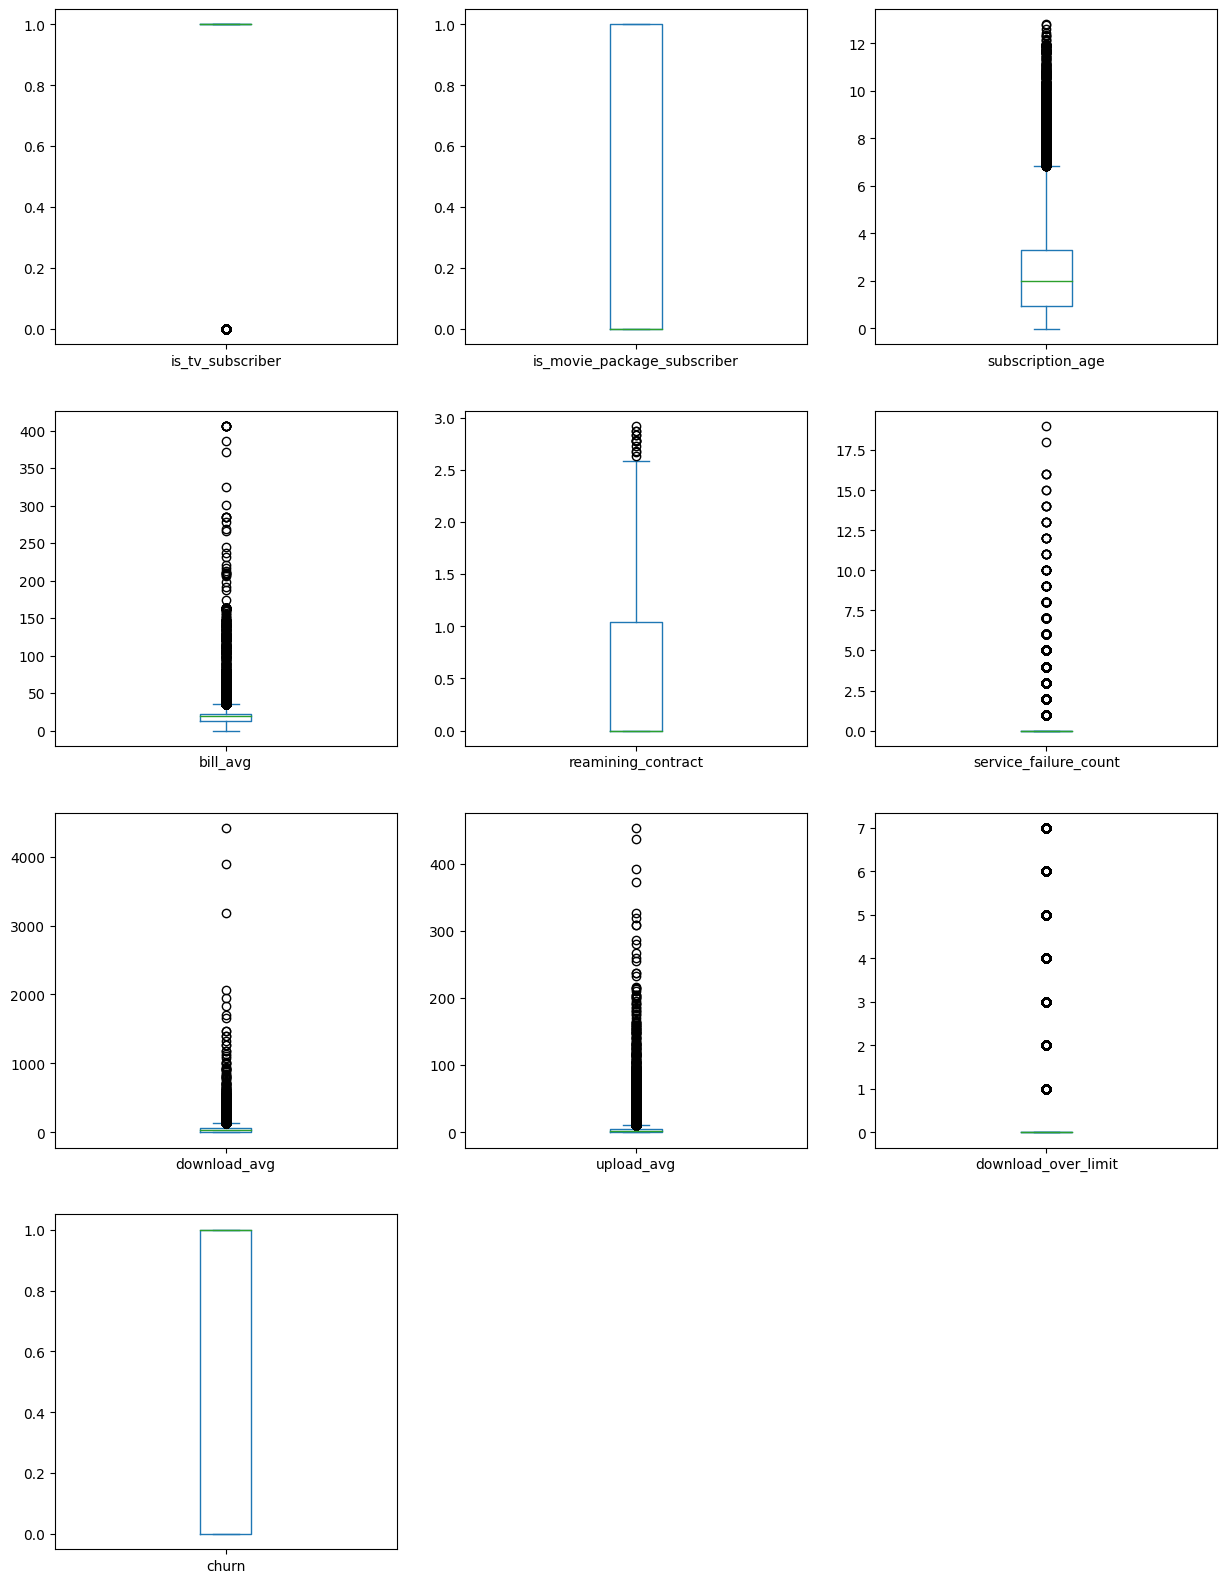

In [15]:
df1[numerical].plot(kind = "box",subplots = True,layout = (4,3),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

In [16]:
numerical

['is_tv_subscriber',
 'is_movie_package_subscriber',
 'subscription_age',
 'bill_avg',
 'reamining_contract',
 'service_failure_count',
 'download_avg',
 'upload_avg',
 'download_over_limit',
 'churn']

In [17]:
rem_list = ['bill_avg',
 'download_avg',
 'upload_avg']

In [18]:
df2 = treat_outliers_all(df1 , rem_list)

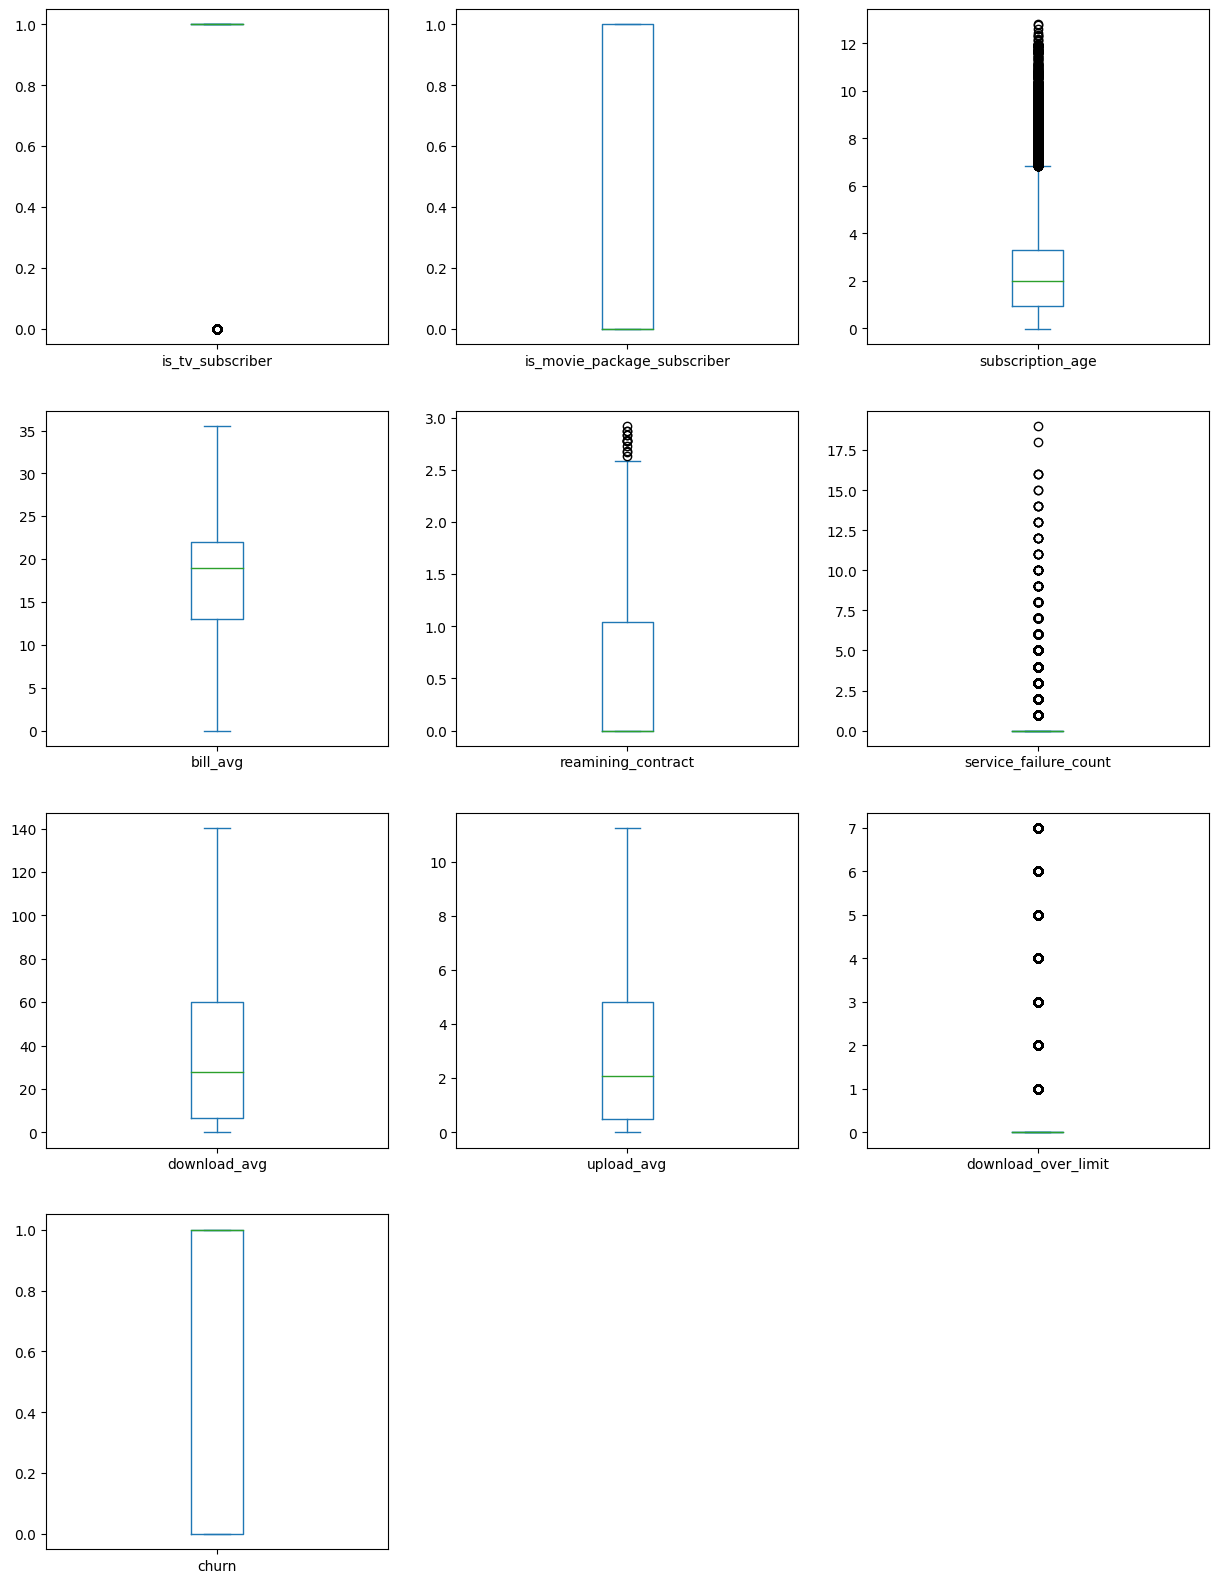

In [19]:
df2[numerical].plot(kind = "box",subplots = True,layout = (4,3),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

Feature Engineering

In [20]:
X = df2.drop(['churn'],axis=1)
y = df2.churn

X.shape, y.shape

((72274, 9), (72274,))

In [21]:
y.value_counts()

1    40050
0    32224
Name: churn, dtype: int64

In [22]:
# create X and Y datasets for training
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,stratify=y, random_state=42, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((57819, 9), (14455, 9), (57819,), (14455,))

In [23]:
from sklearn.preprocessing import MinMaxScaler

cols = X_train.columns
scaler = MinMaxScaler()
X_train_RF = scaler.fit_transform(X_train)
X_test_RF = scaler.transform(X_test)

X_train_RF = pd.DataFrame(X_train_RF,columns=cols)
X_test_RF = pd.DataFrame(X_test_RF,columns=cols)

In [24]:
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train_RF, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [25]:
print('Training set score: {:.4f}'.format(logreg.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test_RF, y_test)))

Training set score: 0.8707
Test set score: 0.8710


In [26]:
y_pred = logreg.predict(X_test_RF)

In [27]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[5330, 1115],
       [ 749, 7261]], dtype=int64)

In [28]:
log_accuracy = logreg.score(X_test_RF, y_test)
log_accuracy

0.8710480802490488

In [29]:
# precision
log_pre = precision_score(y_test, y_pred)
log_pre

0.8668815663801337

In [30]:
# recall
log_rec = recall_score(y_test, y_pred)
log_rec

0.9064918851435705

KNN

In [31]:
from math import sqrt
print(sqrt(X_train.shape[1]))

3.0


In [32]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1,5)
#20 because sqrt of len(X_train)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

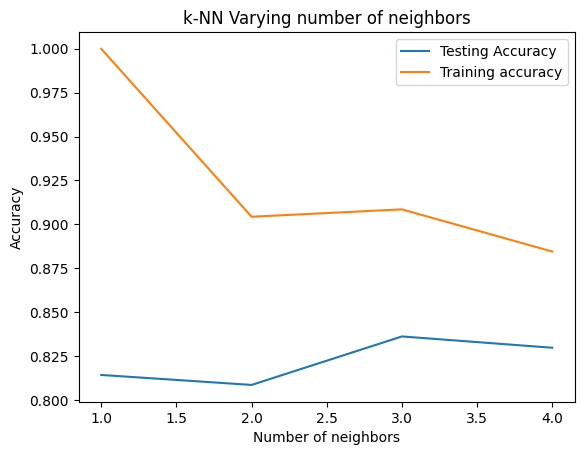

In [33]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [34]:
knn = KNeighborsClassifier(n_neighbors=3)

#Fit the model
knn.fit(X_train, y_train)
    
#Compute accuracy on the training set
train_accuracy = knn.score(X_train, y_train)
    
#Compute accuracy on the test set
test_accuracy = knn.score(X_test, y_test)

print('Training accuracy: ',train_accuracy)
print('\nTesting accuracy: ',test_accuracy)

Training accuracy:  0.9085421747176534

Testing accuracy:  0.8361812521618817


In [216]:
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,10)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,verbose=1,cv=6)
knn_cv.fit(X_train,y_train)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Fitting 6 folds for each of 9 candidates, totalling 54 fits
Best Score:0.8325117049146936
Best Parameters: {'n_neighbors': 5}


In [217]:
print('Training set score: {:.4f}'.format(knn_cv.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn_cv.score(X_test, y_test)))

Training set score: 0.8878
Test set score: 0.8307


In [218]:
y_pred = knn_cv.predict(X_test)

In [219]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[5472, 1050],
       [1397, 6536]], dtype=int64)

In [223]:
knn_accuracy = knn_cv.score(X_test, y_test)
knn_accuracy

0.8307160152196472

In [221]:
# precision
knn_pre = precision_score(y_test, y_pred)
knn_pre

0.8615871341945689

In [222]:
# recall
knn_rec = recall_score(y_test, y_pred)
knn_rec

0.8239001638724316

Random Forests

In [40]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc = RandomForestClassifier(random_state=12,n_estimators=10)

# fit the model
rfc.fit(X_train_RF, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test_RF)

# Check accuracy score 
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9356


In [41]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc_100 = RandomForestClassifier(random_state=12,n_estimators=100)

# fit the model
rfc_100.fit(X_train_RF, y_train)

# Predict the Test set results
y_pred = rfc_100.predict(X_test_RF)

# Check accuracy score 
from sklearn.metrics import accuracy_score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 100 decision-trees : 0.9388


In [42]:
print('Training set score: {:.4f}'.format(rfc_100.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(rfc_100.score(X_test_RF, y_test)))

Training set score: 0.9999
Test set score: 0.9388


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
parameters = {
    'n_estimators': [100, 150, 200, 250, 300,500,1000],
    'max_depth': [10, 20, None],
    'bootstrap':[True],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,5,10]
}
regr = RandomForestClassifier(random_state=12)

clf = GridSearchCV(regr, parameters,verbose=10,n_jobs=6,cv=3)
clf.fit(X_train_RF, y_train)
print("Best params: ", clf.best_params_)

In [44]:
import pickle

pickled_model = pickle.load(open('rfcv.pkl', 'rb'))
y_pred = pickled_model.predict(X_test_RF)

In [ ]:
y_pred = clf.predict(X_test_RF)

In [46]:
print('Training set score: {:.4f}'.format(pickled_model.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(pickled_model.score(X_test_RF, y_test)))

Training set score: 0.9822
Test set score: 0.9399


In [ ]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

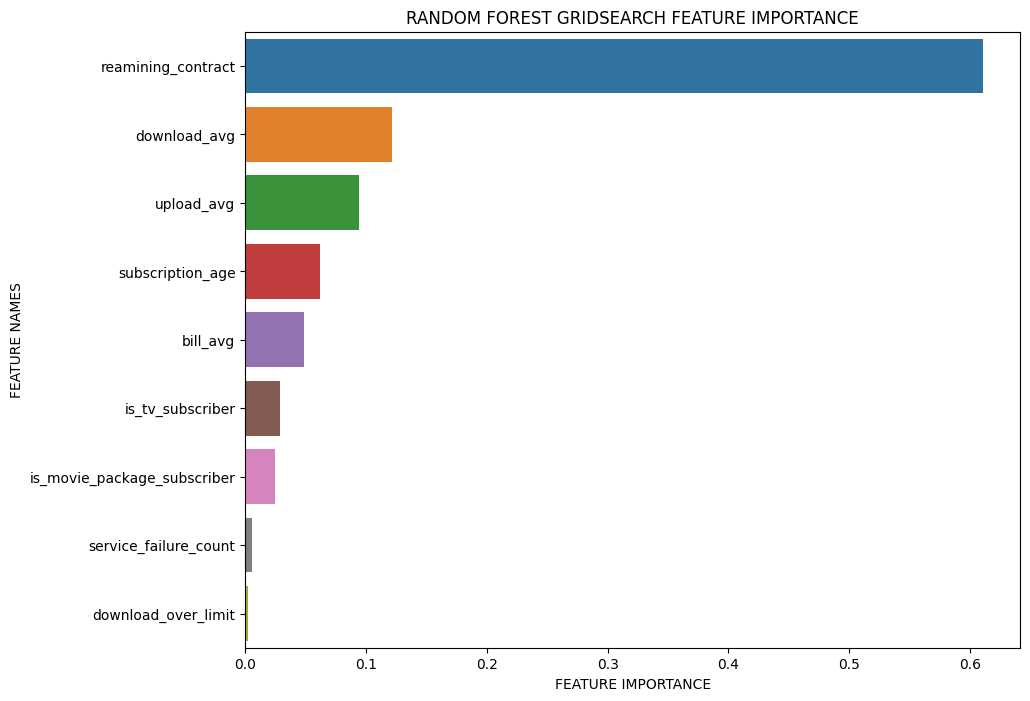

In [ ]:
plot_feature_importance(clf.best_estimator_.feature_importances_,X_train_RF.columns,'RANDOM FOREST GRIDSEARCH ')

In [47]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[6085,  360],
       [ 509, 7501]], dtype=int64)

In [48]:
rfcv_accuracy = pickled_model.score(X_test_RF, y_test)
rfcv_accuracy

0.9398823936354203

In [49]:
# precision
rfcv_pre = precision_score(y_test, y_pred)
rfcv_pre

0.9542042997074164

In [50]:
# recall
rfcv_rec = recall_score(y_test, y_pred)
rfcv_rec

0.93645443196005

since it took 15 mins to build, its worth saving it locally!

In [ ]:
import pickle
pickle.dump(clf, open('rfcv.pkl', 'wb'))

CNN

In [51]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
# Importing libraries for building the neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold, train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf

In [52]:
churn_model = Sequential()
churn_model.add(Dense(256, input_shape = (X_train_RF.shape[1],), activation = "relu"))
churn_model.add(Dense(512, activation = "relu"))
churn_model.add(Dense(1024, activation = "relu"))
churn_model.add(Dropout(0.2))
churn_model.add(Dense(1024, activation = "relu"))
churn_model.add(Dense(512, activation = "relu"))
churn_model.add(Dense(256, activation = "relu"))
churn_model.add(Flatten())
churn_model.add(Dense(512, activation = "relu"))
churn_model.add(Dropout(0.5))
churn_model.add(Dense(512, activation = "relu"))
churn_model.add(Dropout(0.5))
# churn_model.add(Dense(1, activation = "sigmoid",kernel_regularizer = "binary_crossentropy"))
churn_model.add(Dense(1, activation = "sigmoid"))
churn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2560      
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dense_5 (Dense)             (None, 256)               1

In [53]:
optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
losses = tf.keras.losses.binary_crossentropy
churn_model.compile(optimizer=optimizer, loss=losses, metrics=['accuracy'])

In [54]:
m_loss = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [55]:
save_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='churn_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

In [56]:
history=churn_model.fit(X_train_RF, y_train, epochs=100,validation_split=0.2, batch_size=128, verbose=1,callbacks=[m_loss,save_checkpoint])

Epoch 1/100


c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1508: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


351/362 [============================>.] - ETA: 0s - loss: 0.3025 - accuracy: 0.8919
Epoch 1: val_accuracy improved from -inf to 0.91941, saving model to churn_model.h5
362/362 [==============================] - 4s 5ms/step - loss: 0.3017 - accuracy: 0.8922 - val_loss: 0.2468 - val_accuracy: 0.9194
Epoch 2/100
356/362 [============================>.] - ETA: 0s - loss: 0.2621 - accuracy: 0.9150
Epoch 2: val_accuracy improved from 0.91941 to 0.92572, saving model to churn_model.h5
362/362 [==============================] - 1s 4ms/step - loss: 0.2619 - accuracy: 0.9150 - val_loss: 0.2311 - val_accuracy: 0.9257
Epoch 3/100
358/362 [============================>.] - ETA: 0s - loss: 0.2475 - accuracy: 0.9206
Epoch 3: val_accuracy improved from 0.92572 to 0.93238, saving model to churn_model.h5
362/362 [==============================] - 1s 4ms/step - loss: 0.2478 - accuracy: 0.9205 - val_loss: 0.2300 - val_accuracy: 0.9324
Epoch 4/100
354/362 [============================>.] - ETA: 0s - loss:

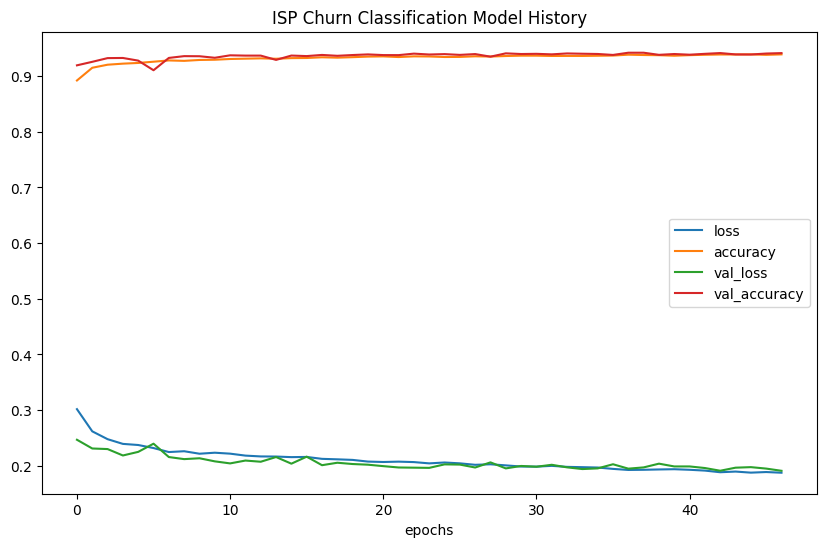

In [57]:
dfh = pd.DataFrame(history.history)
plt.figure(figsize=(10, 6))
plt.title('ISP Churn Classification Model History')
plt.plot(dfh)
plt.xlabel('epochs')
plt.legend(dfh.columns)
plt.show()

In [58]:
print("Evaluate churn_model against trained data")
score = churn_model.evaluate(X_train_RF, y_train, verbose=0)
print("score %s: %.2f%%" % (churn_model.metrics_names[1], score[1]*100))

print("Evaluate churn_model against test data")
score = churn_model.evaluate(X_test_RF, y_test, verbose=0)
print("score %s: %.2f%%" % (churn_model.metrics_names[1], score[1]*100))

Evaluate churn_model against trained data
score accuracy: 94.01%
Evaluate churn_model against test data
score accuracy: 93.51%


In [59]:
y_pred = churn_model.predict(X_test_RF)

452/452 [==============================] - 1s 1ms/step


In [60]:
# extract the predicted probabilities
p_pred = churn_model.predict(X_test_RF)
p_pred = p_pred.flatten()
print(p_pred.round(2))

452/452 [==============================] - 0s 984us/step
[0.98 0.99 0.02 ... 0.   0.   1.  ]


In [61]:
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)

[1 1 0 ... 0 0 1]


In [62]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[6027,  418],
       [ 520, 7490]], dtype=int64)

In [63]:
cnn_accuracy = (6024+7483)/(6024+7483+421+527)
cnn_accuracy

0.9344171566931857

In [64]:
# precision
cnn_pre = precision_score(y_test, y_pred)
cnn_pre

0.9471421345472939

In [65]:
# recall
cnn_rec = recall_score(y_test, y_pred)
cnn_rec

0.9350811485642946

lgbm

In [111]:
import lightgbm as lgb
lgbm_clf = lgb.LGBMClassifier()
lgbm_clf.fit(X_train, y_train)

LGBMClassifier()

In [112]:
#print the scores on training and test set

print('Training set score: {:.4f}'.format(lgbm_clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(lgbm_clf.score(X_test, y_test)))

Training set score: 0.9461
Test set score: 0.9408


Hyperparameter tuning

In [165]:
from optuna.integration import LightGBMPruningCallback
import optuna
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgbm

def objective(trial, X, y):
    param_grid = {
        "device_type": trial.suggest_categorical("device_type", ['gpu']),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_child_samples": trial.suggest_int("min_child_samples",20,200),
        "subsample": trial.suggest_float("subsample",0.5,0.9),
        "colsample_bytree": trial.suggest_float("colsample_bytree",0.5,0.9),
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1121218)

    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = lgbm.LGBMClassifier(objective="binary", **param_grid)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_test, y_test)],
            eval_metric="binary_logloss",
            early_stopping_rounds=100,
            callbacks=[
                LightGBMPruningCallback(trial, "binary_logloss")
            ],  # Add a pruning callback
        )
        preds = model.predict_proba(X_test)
        cv_scores[idx] = log_loss(y_test, preds)

    return np.mean(cv_scores)

In [167]:
study = optuna.create_study(direction="minimize", study_name="LGBM Classifier")
func = lambda trial: objective(trial, X, y)
study.optimize(func, n_trials=20)

[I 2023-03-04 10:48:08,157] A new study created in memory with name: LGBM Classifier
c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:490: UserWarning: The repor

In [168]:
print(f"\tBest value (logloss): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

	Best value (logloss): 0.16670
	Best params:
		device_type: gpu
		learning_rate: 0.25144038599882873
		num_leaves: 1300
		max_depth: 10
		min_child_samples: 127
		subsample: 0.6547904945671463
		colsample_bytree: 0.8520716404365728


In [169]:
study.best_params

{'device_type': 'gpu',
 'learning_rate': 0.25144038599882873,
 'num_leaves': 1300,
 'max_depth': 10,
 'min_child_samples': 127,
 'subsample': 0.6547904945671463,
 'colsample_bytree': 0.8520716404365728}

In [173]:
lgbm_clf = lgb.LGBMClassifier(device_type= 'gpu',
 learning_rate= 0.17235330596685344,
 num_leaves= 2840,
 max_depth= 10,
 min_child_samples= 115)
lgbm_clf.fit(X_train, y_train)

LGBMClassifier(device_type='gpu', learning_rate=0.17235330596685344,
               max_depth=10, min_child_samples=115, num_leaves=2840)

In [174]:
#print the scores on training and test set

print('Training set score: {:.4f}'.format(lgbm_clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(lgbm_clf.score(X_test, y_test)))

Training set score: 0.9551
Test set score: 0.9415


In [175]:
y_pred=lgbm_clf.predict(X_test)

In [176]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[6151,  371],
       [ 474, 7459]], dtype=int64)

In [177]:
lgbm_accuracy = lgbm_clf.score(X_test, y_test)
lgbm_accuracy

0.9415427187824282

In [178]:
# precision
lgbm_pre = precision_score(y_test, y_pred)
lgbm_pre

0.9526181353767561

In [179]:
# recall
lgbm_rec = recall_score(y_test, y_pred)
lgbm_rec

0.940249590318921

XGB

In [180]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score
# can change the range to get better results
def objective(trial):
    # Define the hyperparameters to optimize
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 1e2, log=True),
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 1e0, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 50, 200, step=15),
        'lambda': trial.suggest_float('lambda', 1e-8, 1.0),
        'alpha': trial.suggest_float('alpha', 1e-8, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 9),
        'eta': trial.suggest_float('eta', 1e-8, 1.0),
        'gamma': trial.suggest_float('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
        'n_jobs': 6,
        'random_state': 0
    }

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

    # Train the model
    model = xgb.XGBClassifier(**param)
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    auc = roc_auc_score(y_test, y_pred)

    return auc


In [183]:
# Can change the number of trials to check for better results
study = optuna.create_study(direction='maximize', study_name='XGB Classifier')
study.optimize(objective, n_trials=300)

[I 2023-03-04 10:54:55,408] A new study created in memory with name: XGB Classifier
[I 2023-03-04 10:54:56,793] Trial 0 finished with value: 0.9140049041510755 and parameters: {'reg_lambda': 0.0014115280146894083, 'learning_rate': 0.002568347631250936, 'n_estimators': 155, 'lambda': 0.19094156304267684, 'alpha': 0.8622986767568731, 'max_depth': 8, 'eta': 0.9182511255295024, 'gamma': 0.8049326295849121, 'subsample': 0.7418062884995393, 'colsample_bytree': 0.2898322211889479, 'min_child_weight': 107}. Best is trial 0 with value: 0.9140049041510755.
[I 2023-03-04 10:54:57,990] Trial 1 finished with value: 0.931701478106681 and parameters: {'reg_lambda': 26.03120655864436, 'learning_rate': 0.0002774737720315696, 'n_estimators': 170, 'lambda': 0.11767787063313262, 'alpha': 0.37390002626446533, 'max_depth': 4, 'eta': 0.29354483403615894, 'gamma': 0.9023278427828734, 'subsample': 0.8563226580801722, 'colsample_bytree': 0.565798735296214, 'min_child_weight': 47}. Best is trial 1 with value: 0.

In [184]:
print("Important parameters For XGB is")
print(optuna.importance.get_param_importances(study))

Important parameters For XGB is
OrderedDict([('lambda', 0.36981422369662503), ('colsample_bytree', 0.27304922344456595), ('min_child_weight', 0.10803742168269706), ('subsample', 0.10802096428647372), ('learning_rate', 0.09991918299600883), ('gamma', 0.033276762533314665), ('alpha', 0.003056688807057547), ('reg_lambda', 0.002146135447069264), ('eta', 0.001695662573328652), ('max_depth', 0.0005243090423627624), ('n_estimators', 0.0004594254904963477)])


In [187]:
best_params = study.best_trial.params
print("Best Parameter For XGB is")
print(best_params)

Best Parameter For XGB is
{'reg_lambda': 2.685633295706829, 'learning_rate': 0.09908308478141192, 'n_estimators': 95, 'lambda': 0.030526778601174486, 'alpha': 0.8865533029194594, 'max_depth': 9, 'eta': 0.5642254076324388, 'gamma': 0.10494133681368037, 'subsample': 0.8035676972697908, 'colsample_bytree': 0.9974870279712946, 'min_child_weight': 1}


In [188]:
model_xgb = xgb.XGBClassifier(objective='binary:logistic', **best_params)
model_xgb.fit(X_train,y_train)

XGBClassifier(alpha=0.8865533029194594, base_score=0.5, booster='gbtree',
              callbacks=None, colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.9974870279712946, early_stopping_rounds=None,
              enable_categorical=False, eta=0.5642254076324388,
              eval_metric=None, feature_types=None, gamma=0.10494133681368037,
              gpu_id=-1, grow_policy='depthwise', importance_type=None,
              interaction_constraints='', lambda=0.030526778601174486,
              learning_rate=0.09908308478141192, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=9, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=95, n_jobs=0, ...)

In [189]:
#print the scores on training and test set

print('Training set score: {:.4f}'.format(model_xgb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model_xgb.score(X_test, y_test)))

Training set score: 0.9527
Test set score: 0.9418


In [190]:
y_pred=model_xgb.predict(X_test)

In [191]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[6159,  363],
       [ 478, 7455]], dtype=int64)

In [192]:
xgb_accuracy = model_xgb.score(X_test, y_test)
xgb_accuracy

0.9418194396402629

In [193]:
# precision
xgb_pre = precision_score(y_test, y_pred)
xgb_pre

0.9535686876438987

In [194]:
# recall
xgb_rec = recall_score(y_test, y_pred)
xgb_rec

0.939745367452414

Catboost

In [206]:
from catboost import CatBoostClassifier, Pool
import sklearn
import catboost

def objective(trial):
    train_x, valid_x, train_y, valid_y = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

    params = {
        'loss_function': 'Logloss',
        'eval_metric': 'Accuracy',
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 1e-1),
        'depth': trial.suggest_int('depth', 1, 12),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-5, 1e2),
        'random_strength': trial.suggest_float('random_strength', 1e-5, 1e2),
        'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
        'od_wait': trial.suggest_int('od_wait', 10, 50),
        'iterations': trial.suggest_int("iterations",500,2000)
    }

    if params['od_type'] == 'Iter':
        del params['od_wait']

    train_pool = Pool(train_x, train_y)
    valid_pool = Pool(valid_x, valid_y)

    model = CatBoostClassifier(**params)
    model.fit(train_pool, eval_set=valid_pool, use_best_model=True, verbose=False)

    y_pred = model.predict(valid_x)
    accuracy = sklearn.metrics.accuracy_score(valid_y, y_pred)

    return 1.0 - accuracy

In [208]:
study = optuna.create_study(direction="minimize",study_name="CatBoost Classifier")
study.optimize(objective, n_trials=20, timeout=600)

[I 2023-03-04 11:14:54,314] A new study created in memory with name: CatBoost Classifier
[I 2023-03-04 11:14:58,593] Trial 0 finished with value: 0.0618471117260464 and parameters: {'learning_rate': 0.06179260131844694, 'depth': 8, 'l2_leaf_reg': 97.21764712049887, 'random_strength': 31.45323926026615, 'od_type': 'Iter', 'od_wait': 36, 'iterations': 665}. Best is trial 0 with value: 0.0618471117260464.
[I 2023-03-04 11:15:24,139] Trial 1 finished with value: 0.059979245935662395 and parameters: {'learning_rate': 0.025325894181165848, 'depth': 11, 'l2_leaf_reg': 88.09535928677865, 'random_strength': 0.790904952474684, 'od_type': 'IncToDec', 'od_wait': 13, 'iterations': 617}. Best is trial 1 with value: 0.059979245935662395.
[I 2023-03-04 11:15:36,314] Trial 2 finished with value: 0.059425804219993106 and parameters: {'learning_rate': 0.07980923903362767, 'depth': 11, 'l2_leaf_reg': 34.11274043012025, 'random_strength': 74.32235666753388, 'od_type': 'Iter', 'od_wait': 15, 'iterations': 1

In [209]:
print("Important parameters For cat is")
print(optuna.importance.get_param_importances(study))

Important parameters For cat is
OrderedDict([('learning_rate', 0.6363276386009985), ('od_wait', 0.16116481592008938), ('depth', 0.08854473632021749), ('l2_leaf_reg', 0.06388407880564734), ('random_strength', 0.02824699146765623), ('od_type', 0.01128837953487145), ('iterations', 0.01054335935051961)])


In [210]:
best_params_cat = study.best_trial.params
print("Best Parameter For cat is")
print(best_params_cat)

Best Parameter For cat is
{'learning_rate': 0.04768629592340261, 'depth': 9, 'l2_leaf_reg': 81.31359399700223, 'random_strength': 60.33033147810117, 'od_type': 'IncToDec', 'od_wait': 10, 'iterations': 1989}


In [211]:
model_cat = CatBoostClassifier(**best_params_cat)
model_cat.fit(X_train,y_train)

0:	learn: 0.6505806	total: 24.5ms	remaining: 48.8s
1:	learn: 0.6064871	total: 50.5ms	remaining: 50.2s
2:	learn: 0.5688969	total: 75.3ms	remaining: 49.8s
3:	learn: 0.5348868	total: 97.1ms	remaining: 48.2s
4:	learn: 0.4999055	total: 118ms	remaining: 46.7s
5:	learn: 0.4658134	total: 136ms	remaining: 45.1s
6:	learn: 0.4496658	total: 157ms	remaining: 44.4s
7:	learn: 0.4236465	total: 176ms	remaining: 43.6s
8:	learn: 0.4035595	total: 189ms	remaining: 41.5s
9:	learn: 0.3863493	total: 207ms	remaining: 40.9s
10:	learn: 0.3698065	total: 225ms	remaining: 40.5s
11:	learn: 0.3588169	total: 242ms	remaining: 39.9s
12:	learn: 0.3483129	total: 260ms	remaining: 39.6s
13:	learn: 0.3385068	total: 279ms	remaining: 39.3s
14:	learn: 0.3317324	total: 296ms	remaining: 39s
15:	learn: 0.3237686	total: 314ms	remaining: 38.7s
16:	learn: 0.3156689	total: 330ms	remaining: 38.3s
17:	learn: 0.3137315	total: 347ms	remaining: 38s
18:	learn: 0.3072649	total: 364ms	remaining: 37.8s
19:	learn: 0.2993617	total: 381ms	remaini

In [212]:
#print the scores on training and test set

print('Training set score: {:.4f}'.format(model_cat.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model_cat.score(X_test, y_test)))

Training set score: 0.9522
Test set score: 0.9415


In [213]:
y_pred=model_cat.predict(X_test)

In [214]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[6154,  368],
       [ 477, 7456]], dtype=int64)

In [215]:
cat_accuracy = model_cat.score(X_test, y_test)
cat_pre = precision_score(y_test, y_pred)
cat_rec = recall_score(y_test, y_pred)

In [225]:
# creating performance dictionary
performance = {'Accuracy_Score':[log_accuracy, knn_accuracy, rfcv_accuracy, cnn_accuracy,lgbm_accuracy,xgb_accuracy,cat_accuracy],
              'Precision':[log_pre, knn_pre, rfcv_pre, cnn_pre,lgbm_pre,xgb_pre,cat_pre],
              'Recall': [log_rec, knn_rec, rfcv_rec, cnn_rec,lgbm_rec,xgb_rec,cat_rec]}

In [226]:
performance_df = pd.DataFrame(data = performance, index= ['Logistic Regression', 'KNeighbors', 
                                                             'RandomForest Gridsearch',
                                                                'ANN','LGBMClassifier','XGBClassifier','CatBoostClassifier'])

In [228]:
performance_df.sort_values(by=['Accuracy_Score'],ascending=False)

,Accuracy_Score,Precision,Recall
XGBClassifier,0.941819,0.953569,0.939745
LGBMClassifier,0.941543,0.952618,0.940250
CatBoostClassifier,0.941543,0.952965,0.939871
RandomForest Gridsearch,0.939882,0.954204,0.936454
ANN,0.934417,0.947142,0.935081
Logistic Regression,0.871048,0.866882,0.906492
KNeighbors,0.830716,0.861587,0.823900


XGBClassifier performs best

ANN comes very close to RF with Gridsearch, but does not do better. Maybe generating a better ANN model might help. However, ANN took 40 secs to build a model, whereas RFCV ran for about 15 mins! Hence we can see how Neural Networks can help achieve better results in shorter durations!